# Capstone3 - 1 Data wrangling

## 1.1 Imports

In [1]:
import pandas as pd
import urllib
import json
import unidecode
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import datetime
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
from ipywidgets import FileUpload
from IPython.display import display
import io
from PIL import Image

## 1.2 Load The 'Olist' E-Commerce Dataset

In [3]:
orders = pd.read_csv(r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\olist_orders_dataset.csv')
order_items = pd.read_csv(r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\olist_order_items_dataset.csv')
products = pd.read_csv(r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\olist_products_dataset.csv')
customers = pd.read_csv(r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\olist_customers_dataset.csv')
geolocation = pd.read_csv(r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\olist_geolocation_dataset.csv')
translation = pd.read_csv(r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\product_category_name_translation.csv')

#### 1.2.1 Check olist_orders_dataset

In [4]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
# Drop unncessary columns
orders = orders.drop(columns = ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']).drop_duplicates()

In [6]:
# Check null values
orders.isna().mean()

order_id                         0.0
customer_id                      0.0
order_status                     0.0
order_purchase_timestamp         0.0
order_estimated_delivery_date    0.0
dtype: float64

In [7]:
# Check duplicates
orders.groupby('order_id').size().sort_values(ascending=False)

order_id
00010242fe8c5a6d1ba2dd792cb16214    1
ab291c01a71273689c1e6ea624b083dc    1
ab344aaf7040ad7bcee8c7ae7db9e87e    1
ab30f8d4ebb7d33d1dcf54d420ea42cd    1
ab30f399d360ddf62897051d813f887d    1
                                   ..
55539e6edbbf2276dc9e2eab8af0fa8d    1
55538582ef35a95e5ed4047c6bf04695    1
5553543e89ef381e4ff08f6b91b94690    1
55534471fcbe2dd1436234e7cfa4de5a    1
fffe41c64501cc87c801fd61db3f6244    1
Length: 99441, dtype: int64

#### 1.2.2 Check olist_order_items_dataset

In [8]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
# Check null values
order_items.isna().mean()

order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64

In [10]:
# Check duplicates
order_items.groupby('order_id').size().sort_values(ascending=False)

order_id
8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
5a0911d70c1f85d3bed0df1bf693a6dd     1
5a082b558a3798d3e36d93bfa8ca1eae     1
5a07264682e0b8fbb3f166edbbffc6e8     1
5a071192a28951b76774e5a760c8c9b7     1
fffe41c64501cc87c801fd61db3f6244     1
Length: 98666, dtype: int64

There are duplicate order_id, because the dataset is per product.

#### 1.2.3 Check olist_products_dataset

In [11]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [12]:
# Drop unnecessary columns
products = products.drop(columns = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']).drop_duplicates()

In [13]:
## Check null values
products.isna().mean()

product_id               0.000000
product_category_name    0.018512
dtype: float64

In [14]:
products[products['product_category_name'].isnull() == True]

,product_id,product_category_name
105,a41e356c76fab66334f36de622ecbd3a,NaN
128,d8dee61c2034d6d075997acef1870e9b,NaN
145,56139431d72cd51f19eb9f7dae4d1617,NaN
154,46b48281eb6d663ced748f324108c733,NaN
197,5fb61f482620cb672f5e586bb132eae9,NaN
...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN
32772,fa51e914046aab32764c41356b9d4ea4,NaN


In [15]:
# Check duplicates
products.groupby('product_id').size().sort_values(ascending=False)

product_id
00066f42aeeb9f3007548bb9d3f33c38    1
abef8cc12c6428d93526f5bd0f76dd0c    1
aba9cea5277910afdc1ad5dec5583e1b    1
aba92acbdc38cb3a656015d4fa601a23    1
aba86c093ccdbac75b09111d57e50004    1
                                   ..
5483dc3f61a1d385ccc49cec3a560617    1
547ef2af00ca493818dd33eb5216b22e    1
547b95702aec86f05ac37e61d164891c    1
5479f02af4cde2ebe8801cf2b05cd49b    1
fffe9eeff12fcbd74a2f2b007dde0c58    1
Length: 32951, dtype: int64

#### 1.2.4 Check olist_customers_dataset

In [16]:
# Check olist_customers_dataset
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [17]:
# Check null values
customers.isna().mean()

customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64

In [18]:
# Check duplicates
customers.groupby('customer_unique_id').size().sort_values(ascending=False)

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
6469f99c1f9dfae7733b25662e7f1782     7
ca77025e7201e3b30c44b472ff346268     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
                                    ..
5657dfebff5868c4dc7e8355fea865c4     1
5657596addb4d7b07b32cd330614bdf8     1
5656eb169546146caeab56c3ffc3d268     1
5656a8fabc8629ff96b2bc14f8c09a27     1
ffffd2657e2aad2907e67c3e9daecbeb     1
Length: 96096, dtype: int64

#### 1.2.5 Check olist_geolocation_dataset

In [19]:
# Check olist_geolocation_dataset
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [20]:
# Check null values
geolocation.isna().mean()

geolocation_zip_code_prefix    0.0
geolocation_lat                0.0
geolocation_lng                0.0
geolocation_city               0.0
geolocation_state              0.0
dtype: float64

In [21]:
# Check duplicates
geolocation.groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

geolocation_zip_code_prefix
24220    1146
24230    1102
38400     965
35500     907
11680     879
         ... 
20056       1
76370       1
63012       1
76372       1
32635       1
Length: 19015, dtype: int64

In [22]:
geolocation[geolocation['geolocation_zip_code_prefix'] == 24220]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
470805,24220,-22.905817,-43.106989,niteroi,RJ
470811,24220,-22.902306,-43.112545,niteroi,RJ
470812,24220,-22.904567,-43.110491,niteroi,RJ
470820,24220,-22.902575,-43.109192,niteroi,RJ
470821,24220,-22.907500,-43.106170,niteroi,RJ
...,...,...,...,...,...
474265,24220,-22.904023,-43.111683,niteroi,RJ
474266,24220,-22.905393,-43.100512,niterói,RJ
474269,24220,-22.906420,-43.104933,niteroi,RJ
474270,24220,-22.909701,-43.108452,niteroi,RJ


#### Decode the accents in the city names.

In [23]:
geolocation['geolocation_city'].unique()

array(['sao paulo', 'são paulo', 'sao bernardo do campo', ..., 'ciríaco',
       'estação', 'vila lângaro'], dtype=object)

In [24]:
def noaccent_string(column):
    column_space = ' '.join(column.split())
    return unidecode.unidecode(column_space.lower())

In [25]:
geolocation['geolocation_city'] = geolocation['geolocation_city'].apply(noaccent_string)

In [26]:
geolocation.groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

geolocation_zip_code_prefix
24220    1146
24230    1102
38400     965
35500     907
11680     879
         ... 
20056       1
76370       1
63012       1
76372       1
32635       1
Length: 19015, dtype: int64

In [27]:
# Check the zip codes with two or more states: there are a total of 8 zip codes with two or more states
other_state_geolocation = geolocation.groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
other_state_geolocation[other_state_geolocation['count']>= 2]

,geolocation_zip_code_prefix,count
367,2116,2
1668,4011,2
6506,21550,2
6696,23056,2
14664,72915,2
15879,78557,2
16146,79750,2
16256,80630,2


In [28]:
max_state = geolocation.groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)
max_state

,geolocation_zip_code_prefix,geolocation_state
0,1001,SP
1,1002,SP
2,1003,SP
3,1004,SP
4,1005,SP
...,...,...
19018,99960,RS
19019,99965,RS
19020,99970,RS
19021,99980,RS


In [29]:
geolocation_median = geolocation.groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()

In [30]:
# Check duplicates
geolocation_median.groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state']).size().sort_values(ascending=False)

geolocation_zip_code_prefix  geolocation_city  geolocation_state
1001                         sao paulo         SP                   1
62300                        vicosa do ceara   CE                   1
62375                        carnaubal         CE                   1
62370                        sao benedito      CE                   1
62365                        graca             CE                   1
                                                                   ..
20740                        rio de janeiro    RJ                   1
20735                        rio de janeiro    RJ                   1
20730                        rio de janeiro    RJ                   1
20725                        rio de janeiro    RJ                   1
99990                        muliterno         RS                   1
Length: 19616, dtype: int64

## 1.3 Join the Data

The primary dataset is the "olist_orders_dataset," and the three databases are connected to it directly using the order_id. Additionally, the "olist_customer_dataset" is linked to the order dataset by using customer_id as the key. We'll examine the columns in each dataset and determine if we need them for this project.

In [31]:
uploader = FileUpload(accept=r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 32 Advanced Data Visualization\Capstone 3\db_relationship.JPG', multiple=False)
display(uploader)

FileUpload(value={}, accept='C:\\Users\\JIYOON JUNG\\Desktop\\Springboard\\Unit 32 Advanced Data Visualization…

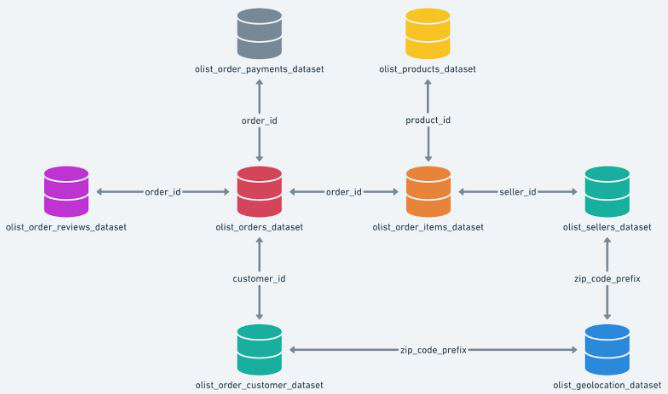

In [32]:
file_name = list(uploader.value.keys())[0]
image_binary_info = uploader.value[file_name]['content']
img_up = Image.open(io.BytesIO(image_binary_info))
img_up

In [33]:
# Merge the olist_orders_dataset with the olist_order_items_dataset by using order_id
orders = pd.merge(orders, order_items, how='left', on='order_id')

# Merge the olist_orders_dataset with the olist_order_customer_dataset by using product_id
orders = pd.merge(orders, products, how='left', on='product_id')

# Merge the olist_orders_dataset with the olist_order_customer_dataset by using customer_id
orders = pd.merge(orders, customers, how='left', on='customer_id')

In [34]:
geolocation_median.head()

,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,1001,sao paulo,SP,-23.550381,-46.634027
1,1002,sao paulo,SP,-23.548551,-46.635072
2,1003,sao paulo,SP,-23.548977,-46.635313
3,1004,sao paulo,SP,-23.549535,-46.634771
4,1005,sao paulo,SP,-23.549612,-46.636532


In [35]:
customers.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [36]:
# Rename the columns for merging.
geolocation_median = geolocation_median.rename(columns={
    'geolocation_zip_code_prefix': 'customer_zip_code_prefix',
    'geolocation_city': 'customer_city',
    'geolocation_state': 'customer_state'})

In [37]:
orders = pd.merge(orders, geolocation_median, how='left', on=['customer_zip_code_prefix', 'customer_city', 'customer_state'])

In [38]:
def plot_brasil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='blue')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()

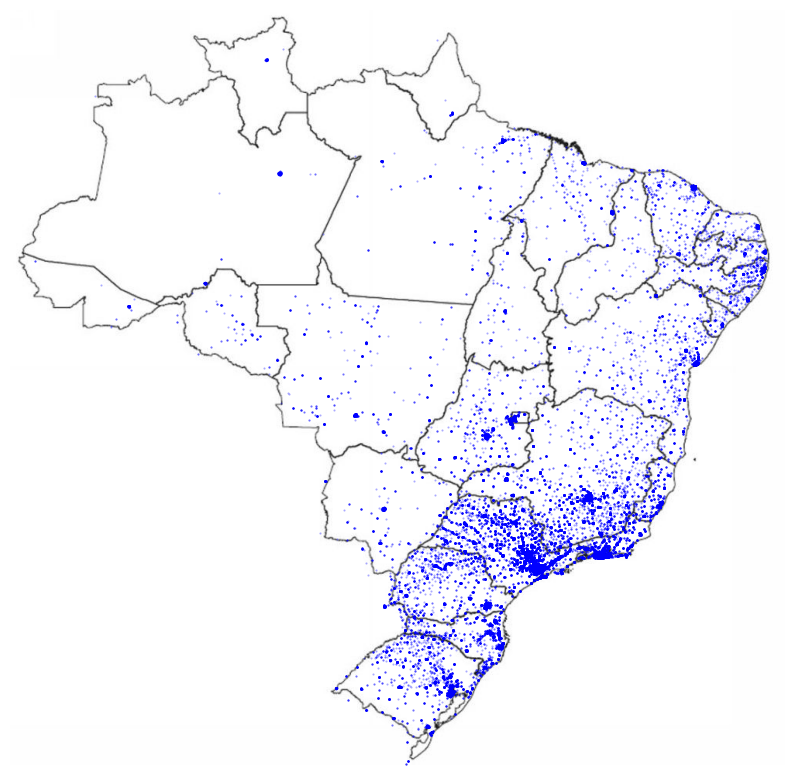

In [39]:
plot_brasil_map(orders.drop_duplicates(subset='customer_unique_id'))

## 1.4 Explore the Data

### 1.4.1 Basic Information

In [40]:
orders.shape

(113425, 18)

In [41]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.576170,-46.587276
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12.126651,-45.008162
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,-16.744472,-48.514624
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,pet_shop,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,-5.774611,-35.273916
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,papelaria,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,-23.675316,-46.515116


In [42]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113425 entries, 0 to 113424
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113425 non-null  object 
 1   customer_id                    113425 non-null  object 
 2   order_status                   113425 non-null  object 
 3   order_purchase_timestamp       113425 non-null  object 
 4   order_estimated_delivery_date  113425 non-null  object 
 5   order_item_id                  112650 non-null  float64
 6   product_id                     112650 non-null  object 
 7   seller_id                      112650 non-null  object 
 8   shipping_limit_date            112650 non-null  object 
 9   price                          112650 non-null  float64
 10  freight_value                  112650 non-null  float64
 11  product_category_name          111047 non-null  object 
 12  customer_unique_id            

### 1.4.2 Change the data

#### 1.4.2.1 Change the datatype

In [43]:
pd.Series(orders.dtypes.values, index=orders.columns)

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_estimated_delivery_date     object
order_item_id                    float64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
product_category_name             object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
geolocation_lat                  float64
geolocation_lng                  float64
dtype: object

In [44]:
# Change the datatype to datetime64
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

In [45]:
orders['order_purchase_timestamp'].dtypes.name

'datetime64[ns]'

In [46]:
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders['shipping_limit_date'] = pd.to_datetime(orders['shipping_limit_date'])

In [47]:
pd.Series(orders.dtypes.values, index=orders.columns)

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                           float64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
product_category_name                    object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
geolocation_lat                         float64
geolocation_lng                         float64
dtype: object

#### 1.4.2.2 Translate the product category name

In [48]:
translation = pd.read_csv(r'C:\Users\JIYOON JUNG\Desktop\Springboard\Unit 15 Data Wrangling\Capstone2\Brazilian E-Commerce Public Dataset by Olist\product_category_name_translation.csv')

In [49]:
translation.head(5)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [50]:
orders = pd.merge(orders, translation, how ='left', on = 'product_category_name')

In [51]:
orders[orders['product_category_name_english'].isnull() == True].product_category_name.unique()

array([nan, 'portateis_cozinha_e_preparadores_de_alimentos', 'pc_gamer'],
      dtype=object)

In [52]:
orders.loc[orders['product_category_name'] == 'portateis_cozinha_e_preparadores_de_alimentos', 'product_category_name_english'] = 'kitchen_laptops_and_food_preparators'
orders.loc[orders['product_category_name'] == 'pc_gamer', 'product_category_name_english'] = 'pc_gamer'
orders.loc[orders['product_category_name'].isna(), 'product_category_name_english'] = 'N/A'

In [53]:
orders[orders['product_category_name_english'].isnull() == True].product_category_name.unique()

array([], dtype=object)

In [54]:
orders.loc[orders['product_category_name_english'] == 'N/A'].shape

(2378, 19)

In [55]:
orders = orders.drop(columns = ['product_category_name'])

In [56]:
orders.shape

(113425, 18)

### 1.4.3 Missing data

In [57]:
missing = pd.concat([orders.isnull().sum(), 100 * orders.isnull().mean()], axis=1)
missing.columns=['count', '%']
print(missing.sort_values('%',ascending=False))

                               count         %
price                            775  0.683271
order_item_id                    775  0.683271
product_id                       775  0.683271
seller_id                        775  0.683271
shipping_limit_date              775  0.683271
freight_value                    775  0.683271
geolocation_lng                  335  0.295349
geolocation_lat                  335  0.295349
customer_zip_code_prefix           0  0.000000
customer_state                     0  0.000000
customer_city                      0  0.000000
order_id                           0  0.000000
customer_unique_id                 0  0.000000
customer_id                        0  0.000000
order_estimated_delivery_date      0  0.000000
order_purchase_timestamp           0  0.000000
order_status                       0  0.000000
product_category_name_english      0  0.000000


In [58]:
orders[orders['price'].isnull() == True]['order_status'].unique()

array(['unavailable', 'canceled', 'created', 'shipped', 'invoiced'],
      dtype=object)

In [59]:
orders[orders['order_item_id'].isnull() == True]['order_status'].unique()

array(['unavailable', 'canceled', 'created', 'shipped', 'invoiced'],
      dtype=object)

In [60]:
orders[orders['geolocation_lng'].isnull() == True]['customer_zip_code_prefix'].unique()

array([87323, 73081, 28160, 71551, 64605, 71676, 70701, 72863, 72268,
       72005, 72300, 70686, 68629, 48967, 59299, 73401, 62898, 83843,
       71810,  7729,  6930, 12332, 71590, 72596, 71884,  7412, 41347,
       72821, 70716, 75784, 71593, 93602, 76968, 78554, 29718, 65137,
       71574, 73310, 72457, 73082, 72535, 28575, 85138, 55863, 76897,
       68511, 72536, 72002, 29196, 70333, 71971, 72595, 28120, 45534,
       72242, 73272, 72023, 71919, 72341, 71953, 72017, 71996, 73255,
       36596, 85894, 72237, 25919, 57254, 87511, 35408, 28530, 73251,
       13307, 56485, 72280, 36857, 71539, 72760, 68514, 85118, 73088,
       28388, 28617, 17390, 48793, 83210, 36248, 29386,  8342, 73369,
       72238, 86135, 43870, 35242, 72587, 72583, 61906, 72465, 75257,
       72867, 72427,  7430, 86996, 11547, 71591, 71905, 72440, 73091,
       36956, 41098, 58734, 25840, 72243, 38710, 12770, 62625, 67105,
       95572, 42843,  7784, 27980, 71208, 39103, 70702, 72549, 72904,
       15903, 71993,

### 1.4.4 Order status (chronological orders)

① created 
→
② invoiced 
→
③ approved
→
④ processing
→
⑤-a.shipped
⑤-b.unavailable
→
⑥ delivered

* Cancellation takes place in any stage. 

In [61]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.576170,-46.587276,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12.126651,-45.008162,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,-16.744472,-48.514624,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,-5.774611,-35.273916,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,-23.675316,-46.515116,stationery


In [62]:
# Check the number of rows with each unique value of variable
order_stat = orders['order_status'].value_counts().to_frame('counts').sort_values('counts', ascending = False).join(
    orders['order_status'].value_counts(dropna=False, normalize=True).to_frame('%'))
order_stat

,counts,%
delivered,110197,0.971541
shipped,1186,0.010456
canceled,706,0.006224
unavailable,610,0.005378
invoiced,361,0.003183
processing,357,0.003147
created,5,0.000044
approved,3,0.000026


In [63]:
orders = orders[orders["order_status"] == 'delivered']
orders.shape

(110197, 18)

In [64]:
missing = pd.concat([orders.isnull().sum(), 100 * orders.isnull().mean()], axis=1)
missing.columns=['count', '%']
print(missing.sort_values('%',ascending=False))

                               count         %
geolocation_lng                  317  0.287667
geolocation_lat                  317  0.287667
order_id                           0  0.000000
customer_id                        0  0.000000
customer_state                     0  0.000000
customer_city                      0  0.000000
customer_zip_code_prefix           0  0.000000
customer_unique_id                 0  0.000000
freight_value                      0  0.000000
price                              0  0.000000
shipping_limit_date                0  0.000000
seller_id                          0  0.000000
product_id                         0  0.000000
order_item_id                      0  0.000000
order_estimated_delivery_date      0  0.000000
order_purchase_timestamp           0  0.000000
order_status                       0  0.000000
product_category_name_english      0  0.000000


### 1.4.5 Categorial Features

In [65]:
df = pd.Series(orders.select_dtypes('object').columns.T)
df

0                         order_id
1                      customer_id
2                     order_status
3                       product_id
4                        seller_id
5               customer_unique_id
6                    customer_city
7                   customer_state
8    product_category_name_english
dtype: object

#### 1.4.5.1 order_Id

In [66]:
orders['order_id'].value_counts()

8272b63d03f5f79c56e9e4120aec44ef    21
ab14fdcfbe524636d65ee38360e22ce8    20
1b15974a0141d54e36626dca3fdc731a    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
2d3ee63d21894eb0e7c3879fa3f9b0d1     1
5d300afae7f792b2a15b92b523a65a8f     1
49ca036c28f05c435aa83b00e220efd9     1
143bfc6b9cf902d763549e6764121aaf     1
66dea50a8b16d9b4dee7af250b4be1a5     1
Name: order_id, Length: 96478, dtype: int64

The dataset shows that the order ID '8272b63d03f5f79c56e9e4120aec44ef' appears 21 times. We need to investigate if there are any other fields that might be causing duplicates. If the value counts are not an accurate way to count the number of orders, we should make necessary adjustments or create additional fields that indicate the number of orders and products.

In [67]:
orders[orders['order_id'] == '8272b63d03f5f79c56e9e4120aec44ef']

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,product_category_name_english
101222,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-28,1.0,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,-23.680171,-46.78383,health_beauty
101223,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-28,2.0,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,-23.680171,-46.78383,health_beauty
101224,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-28,3.0,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,-23.680171,-46.78383,health_beauty
101225,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-28,4.0,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,-23.680171,-46.78383,health_beauty
101226,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-28,5.0,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,-23.680171,-46.78383,health_beauty
101227,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-28,6.0,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,-23.680171,-46.78383,health_beauty
101228,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-28,7.0,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,-23.680171,-46.78383,health_beauty
101229,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-28,8.0,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,-23.680171,-46.78383,health_beauty
101230,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-28,9.0,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,-23.680171,-46.78383,health_beauty
101231,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-28,10.0,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,-23.680171,-46.78383,health_beauty


In [68]:
(orders['order_id']+','+orders['product_id']).value_counts().head()

ab14fdcfbe524636d65ee38360e22ce8,9571759451b1d780ee7c15012ea109d4    20
1b15974a0141d54e36626dca3fdc731a,ee3d532c8a438679776d222e997606b3    20
428a2f660dc84138d969ccd69a0ab6d5,89b190a046022486c635022524a974a8    15
9ef13efd6949e4573a18964dd1bbe7f5,37eb69aca8718e843d897aa7b82f462d    15
9bdc4d4c71aa1de4606060929dee888c,44a5d24dd383324a421569ca697b13c2    14
dtype: int64

In [69]:
orders[(orders['order_id'] == 'ab14fdcfbe524636d65ee38360e22ce8') & (orders['product_id'] == '9571759451b1d780ee7c15012ea109d4')]

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,product_category_name_english
107199,ab14fdcfbe524636d65ee38360e22ce8,bd5d39761aa56689a265d95d8d32b8be,delivered,2017-08-23 09:22:34,2017-09-21,1.0,9571759451b1d780ee7c15012ea109d4,ce27a3cc3c8cc1ea79d11e561e9bebb6,2017-08-30 14:30:23,98.7,14.44,698e1cf81d01a3d389d96145f7fa6df8,74825,goiania,GO,-16.716136,-49.253862,auto
107200,ab14fdcfbe524636d65ee38360e22ce8,bd5d39761aa56689a265d95d8d32b8be,delivered,2017-08-23 09:22:34,2017-09-21,2.0,9571759451b1d780ee7c15012ea109d4,ce27a3cc3c8cc1ea79d11e561e9bebb6,2017-08-30 14:30:23,98.7,14.44,698e1cf81d01a3d389d96145f7fa6df8,74825,goiania,GO,-16.716136,-49.253862,auto
107201,ab14fdcfbe524636d65ee38360e22ce8,bd5d39761aa56689a265d95d8d32b8be,delivered,2017-08-23 09:22:34,2017-09-21,3.0,9571759451b1d780ee7c15012ea109d4,ce27a3cc3c8cc1ea79d11e561e9bebb6,2017-08-30 14:30:23,98.7,14.44,698e1cf81d01a3d389d96145f7fa6df8,74825,goiania,GO,-16.716136,-49.253862,auto
107202,ab14fdcfbe524636d65ee38360e22ce8,bd5d39761aa56689a265d95d8d32b8be,delivered,2017-08-23 09:22:34,2017-09-21,4.0,9571759451b1d780ee7c15012ea109d4,ce27a3cc3c8cc1ea79d11e561e9bebb6,2017-08-30 14:30:23,98.7,14.44,698e1cf81d01a3d389d96145f7fa6df8,74825,goiania,GO,-16.716136,-49.253862,auto
107203,ab14fdcfbe524636d65ee38360e22ce8,bd5d39761aa56689a265d95d8d32b8be,delivered,2017-08-23 09:22:34,2017-09-21,5.0,9571759451b1d780ee7c15012ea109d4,ce27a3cc3c8cc1ea79d11e561e9bebb6,2017-08-30 14:30:23,98.7,14.44,698e1cf81d01a3d389d96145f7fa6df8,74825,goiania,GO,-16.716136,-49.253862,auto
107204,ab14fdcfbe524636d65ee38360e22ce8,bd5d39761aa56689a265d95d8d32b8be,delivered,2017-08-23 09:22:34,2017-09-21,6.0,9571759451b1d780ee7c15012ea109d4,ce27a3cc3c8cc1ea79d11e561e9bebb6,2017-08-30 14:30:23,98.7,14.44,698e1cf81d01a3d389d96145f7fa6df8,74825,goiania,GO,-16.716136,-49.253862,auto
107205,ab14fdcfbe524636d65ee38360e22ce8,bd5d39761aa56689a265d95d8d32b8be,delivered,2017-08-23 09:22:34,2017-09-21,7.0,9571759451b1d780ee7c15012ea109d4,ce27a3cc3c8cc1ea79d11e561e9bebb6,2017-08-30 14:30:23,98.7,14.44,698e1cf81d01a3d389d96145f7fa6df8,74825,goiania,GO,-16.716136,-49.253862,auto
107206,ab14fdcfbe524636d65ee38360e22ce8,bd5d39761aa56689a265d95d8d32b8be,delivered,2017-08-23 09:22:34,2017-09-21,8.0,9571759451b1d780ee7c15012ea109d4,ce27a3cc3c8cc1ea79d11e561e9bebb6,2017-08-30 14:30:23,98.7,14.44,698e1cf81d01a3d389d96145f7fa6df8,74825,goiania,GO,-16.716136,-49.253862,auto
107207,ab14fdcfbe524636d65ee38360e22ce8,bd5d39761aa56689a265d95d8d32b8be,delivered,2017-08-23 09:22:34,2017-09-21,9.0,9571759451b1d780ee7c15012ea109d4,ce27a3cc3c8cc1ea79d11e561e9bebb6,2017-08-30 14:30:23,98.7,14.44,698e1cf81d01a3d389d96145f7fa6df8,74825,goiania,GO,-16.716136,-49.253862,auto
107208,ab14fdcfbe524636d65ee38360e22ce8,bd5d39761aa56689a265d95d8d32b8be,delivered,2017-08-23 09:22:34,2017-09-21,10.0,9571759451b1d780ee7c15012ea109d4,ce27a3cc3c8cc1ea79d11e561e9bebb6,2017-08-30 14:30:23,98.7,14.44,698e1cf81d01a3d389d96145f7fa6df8,74825,goiania,GO,-16.716136,-49.253862,auto


The order size is the maximum order_item_id, but the number and size of different products in each order are not indicated in any columns. After deleting unnecessary information, new columns will be created to display the order-product size.

In [70]:
len(orders)

110197

In [71]:
orders = orders.drop_duplicates().reset_index().drop(['index'], axis = 1)

In [72]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110197 entries, 0 to 110196
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110197 non-null  object        
 1   customer_id                    110197 non-null  object        
 2   order_status                   110197 non-null  object        
 3   order_purchase_timestamp       110197 non-null  datetime64[ns]
 4   order_estimated_delivery_date  110197 non-null  datetime64[ns]
 5   order_item_id                  110197 non-null  float64       
 6   product_id                     110197 non-null  object        
 7   seller_id                      110197 non-null  object        
 8   shipping_limit_date            110197 non-null  datetime64[ns]
 9   price                          110197 non-null  float64       
 10  freight_value                  110197 non-null  float64       
 11  

#### 1.4.5.2 Create 'order_size' and 'product_order_size' columns

In [73]:
orders['order_size'] = orders.groupby('order_id')['order_id'].transform('count')

In [74]:
# Verify the total number of items in the order'ab14fdcfbe524636d65ee38360e22ce8', which is 20.
orders[orders['order_id'] == 'ab14fdcfbe524636d65ee38360e22ce8'].order_size

104154    20
104155    20
104156    20
104157    20
104158    20
104159    20
104160    20
104161    20
104162    20
104163    20
104164    20
104165    20
104166    20
104167    20
104168    20
104169    20
104170    20
104171    20
104172    20
104173    20
Name: order_size, dtype: int64

In [75]:
orders['product_order_size']= orders.groupby(['order_id','product_id'])['product_id'].transform('count')

In [76]:
orders[orders['order_id'] == '8272b63d03f5f79c56e9e4120aec44ef']

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,product_category_name_english,order_size,product_order_size
98323,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-28,1.0,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,-23.680171,-46.78383,health_beauty,21,10
98324,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-28,2.0,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,-23.680171,-46.78383,health_beauty,21,10
98325,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-28,3.0,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,-23.680171,-46.78383,health_beauty,21,10
98326,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-28,4.0,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,-23.680171,-46.78383,health_beauty,21,10
98327,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-28,5.0,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,-23.680171,-46.78383,health_beauty,21,10
98328,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-28,6.0,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,-23.680171,-46.78383,health_beauty,21,10
98329,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-28,7.0,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,-23.680171,-46.78383,health_beauty,21,10
98330,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-28,8.0,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,-23.680171,-46.78383,health_beauty,21,10
98331,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-28,9.0,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,-23.680171,-46.78383,health_beauty,21,10
98332,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-28,10.0,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,-23.680171,-46.78383,health_beauty,21,10


In [77]:
# drop the 'order_item_id' field and drop duplicates values.
orders = orders.drop(columns = ['order_item_id']).drop_duplicates()

In [78]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100196 entries, 0 to 110196
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       100196 non-null  object        
 1   customer_id                    100196 non-null  object        
 2   order_status                   100196 non-null  object        
 3   order_purchase_timestamp       100196 non-null  datetime64[ns]
 4   order_estimated_delivery_date  100196 non-null  datetime64[ns]
 5   product_id                     100196 non-null  object        
 6   seller_id                      100196 non-null  object        
 7   shipping_limit_date            100196 non-null  datetime64[ns]
 8   price                          100196 non-null  float64       
 9   freight_value                  100196 non-null  float64       
 10  customer_unique_id             100196 non-null  object        
 11  

In [79]:
orders['order_id'].nunique()

96478

In [80]:
# Check the order_size distribution.
order_counts = pd.DataFrame(orders[['order_id','order_size']].drop_duplicates()['order_size'].value_counts())
print(order_counts.sum())
order_percentage = (order_counts / order_counts.sum()) * 100
order_summary = pd.concat([order_counts, order_percentage], axis=1).reset_index()
order_summary.columns = ['order_size', 'count', 'percentage']
order_summary = order_summary.sort_values(by = 'order_size').reset_index().drop(['index'], axis = 1)
order_summary

order_size    96478
dtype: int64


,order_size,count,percentage
0,1,86843,90.013267
1,2,7392,7.661850
2,3,1306,1.353676
3,4,495,0.513070
4,5,193,0.200046
5,6,191,0.197973
6,7,22,0.022803
7,8,8,0.008292
8,9,3,0.003110
9,10,8,0.008292


In [81]:
weighted_mean = (order_summary['order_size'] * order_summary['count']).sum() / order_summary['count'].sum()
print("Average_order_size:", round(weighted_mean,2))

Average_order_size: 1.14


About 90% of orders have only one item and the average order size for Olist Brazilian E-commerce is 1.14.

In [82]:
orders['Year'] = orders['order_purchase_timestamp'].dt.year
orders['Month'] = orders['order_purchase_timestamp'].dt.month

In [83]:
order_counts_2 = pd.DataFrame(orders[['Year', 'Month','order_id','order_size']].drop_duplicates()[['Year', 'Month','order_size']].value_counts())
order_counts_2 = order_counts_2.sort_values(by = ['Year', 'Month', 'order_size']).reset_index()
order_counts_2.columns = ['Year', 'Month', 'order_size', 'counts']
order_counts_2

,Year,Month,order_size,counts
0,2016,9,3,1
1,2016,10,1,236
2,2016,10,2,20
3,2016,10,3,4
4,2016,10,4,2
...,...,...,...,...
165,2018,8,4,22
166,2018,8,5,13
167,2018,8,6,13
168,2018,8,7,1


In [84]:
# Calculate the weighted mean within each 'Year' and 'Month' group without using apply or lambda
weighted_mean = (order_counts_2['order_size'] * order_counts_2['counts']).groupby([order_counts_2['Year'], order_counts_2['Month']]).sum() / order_counts_2['counts'].groupby([order_counts_2['Year'], order_counts_2['Month']]).sum()

# Round the calculated weighted mean to 2 decimal places
weighted_mean = pd.DataFrame(weighted_mean.round(2))
weighted_mean

0
Year Month      
2016 9      3.00
     10     1.18
     12     1.00
2017 1      1.22
     2      1.12
     3      1.14
     4      1.12
     5      1.13
     6      1.11
     7      1.14
     8      1.14
     9      1.14
     10     1.16
     11     1.16
     12     1.12
2018 1      1.14
     2      1.15
     3      1.14
     4      1.15
     5      1.16
     6      1.15
     7      1.13
     8      1.12

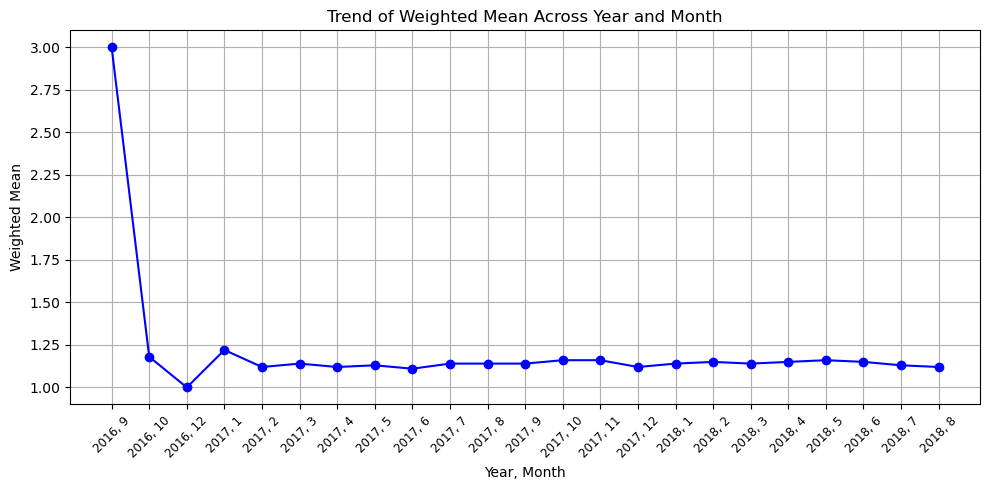

In [85]:
# Combine 'Year' and 'Month' into a single variable for x-axis
x_values = weighted_mean.index.get_level_values('Year').astype(str) + ', ' + weighted_mean.index.get_level_values('Month').astype(str)

# Plotting the trend of weighted mean values
plt.figure(figsize=(10, 5))
plt.plot(x_values, weighted_mean.values, marker='o', linestyle='-', color='b')
plt.xlabel('Year, Month')
plt.ylabel('Weighted Mean')
plt.title('Trend of Weighted Mean Across Year and Month')
plt.xticks(rotation=45, fontsize = 8.5)
plt.grid(True)
plt.tight_layout()
plt.show()

In [86]:
orders.shape

(100196, 21)

#### 1.4.5.3 product_id & product_category_name

In [87]:
# display the product sales by month (Units: Qty)
product_sales_by_month =orders.groupby(['Year', 'Month','product_category_name_english'])['product_order_size'].sum().groupby(['Year', 'Month', 'product_category_name_english']).sum().reset_index(name = 'sales')

product_sales_by_month['total_sales'] = product_sales_by_month.groupby(['Year', 'Month'])['sales'].transform('sum')
product_sales_by_month['sales_percentage'] = round((product_sales_by_month['sales'] / product_sales_by_month['total_sales']) * 100, 2)

product_sales_by_month

,Year,Month,product_category_name_english,sales,total_sales,sales_percentage
0,2016,9,health_beauty,3,3,100.00
1,2016,10,N/A,2,313,0.64
2,2016,10,air_conditioning,8,313,2.56
3,2016,10,audio,2,313,0.64
4,2016,10,auto,8,313,2.56
...,...,...,...,...,...,...
1268,2018,8,sports_leisure,471,7142,6.59
1269,2018,8,stationery,169,7142,2.37
1270,2018,8,telephony,271,7142,3.79
1271,2018,8,toys,165,7142,2.31


In [88]:
# validate the data with the order file.
orders[(orders['Year'] == 2018) & 
       (orders['Month'] == 8) &
       (orders['product_category_name_english'] =='watches_gifts')]['product_order_size'].sum()

411

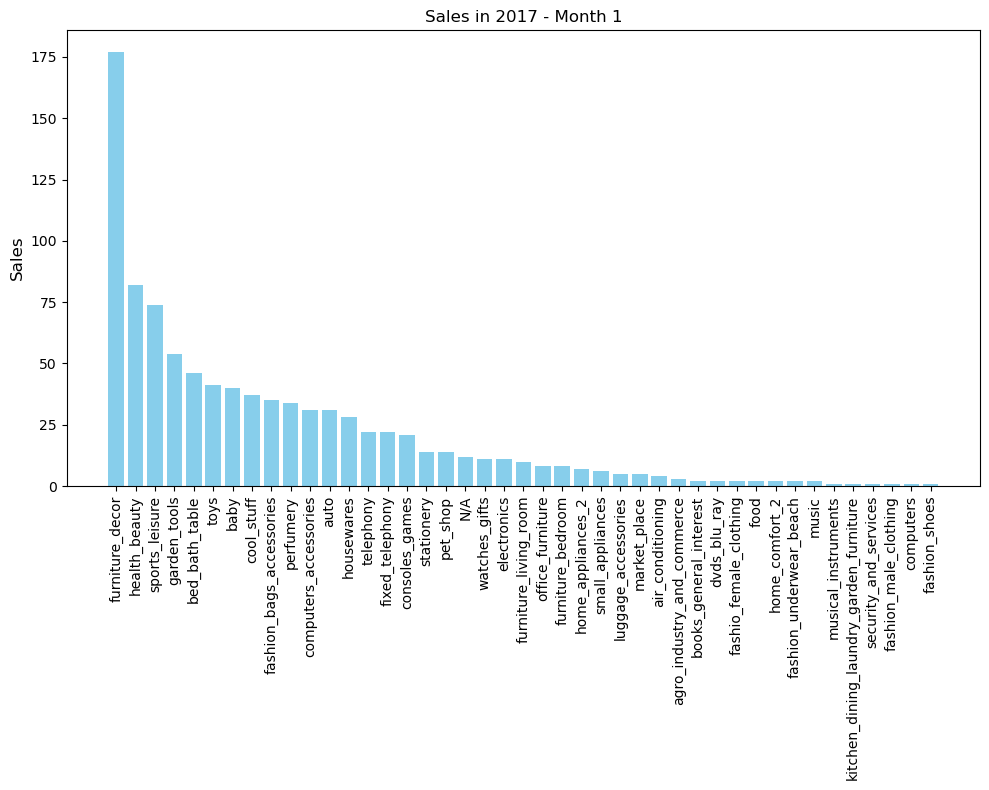

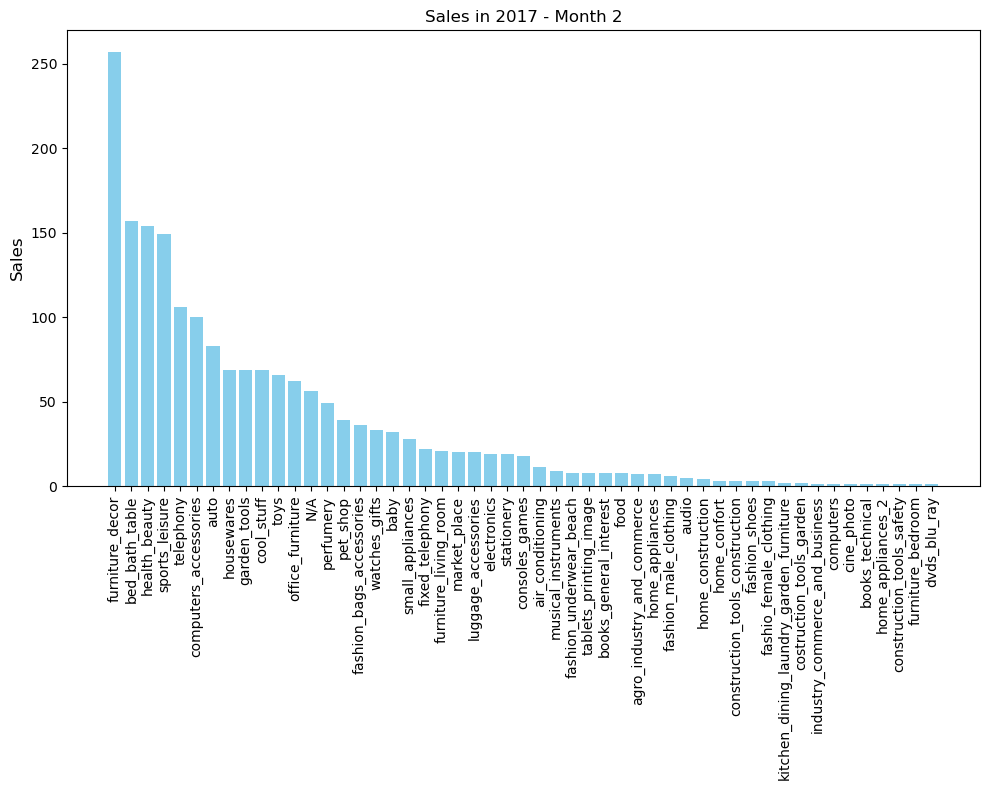

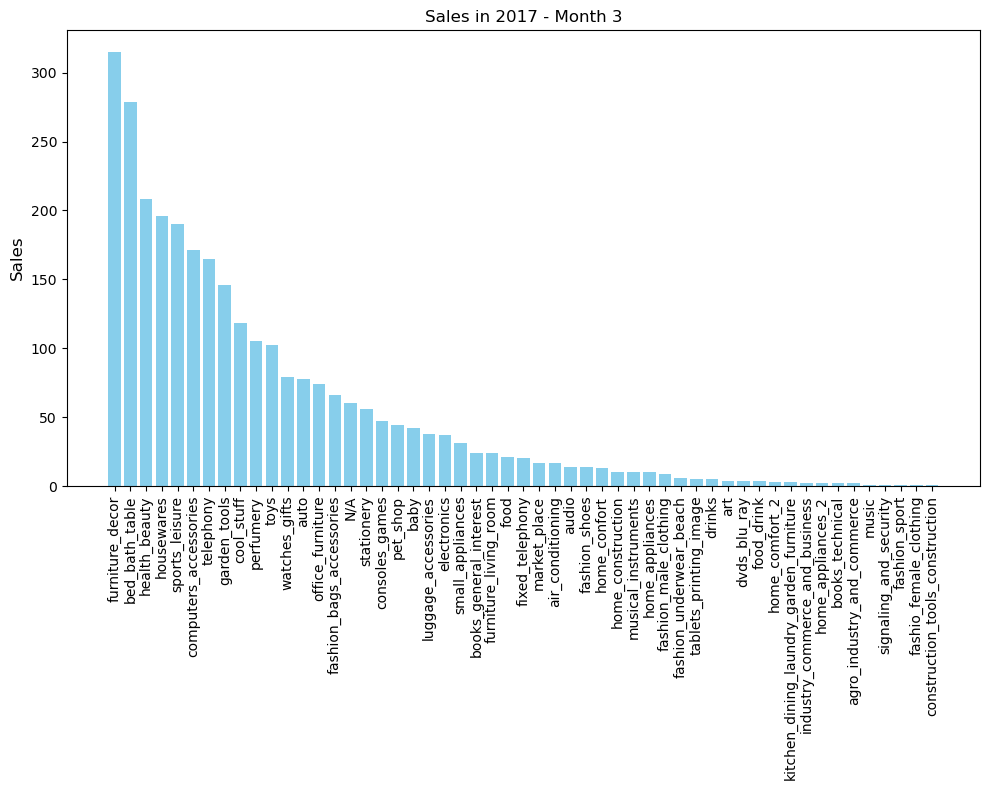

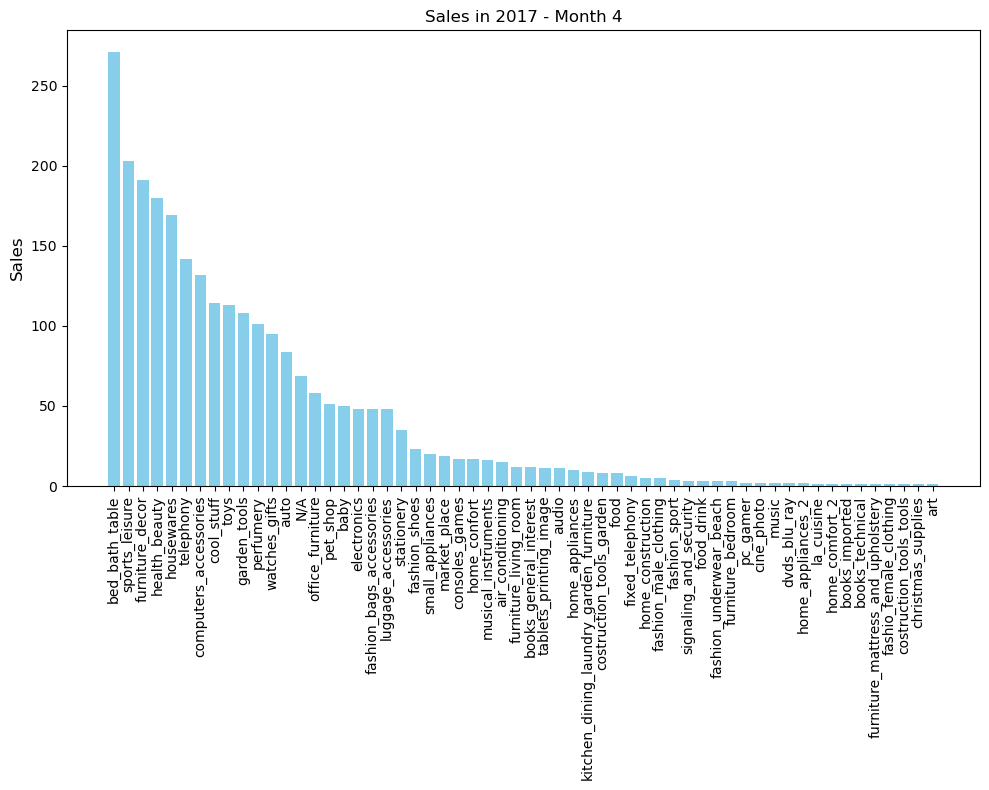

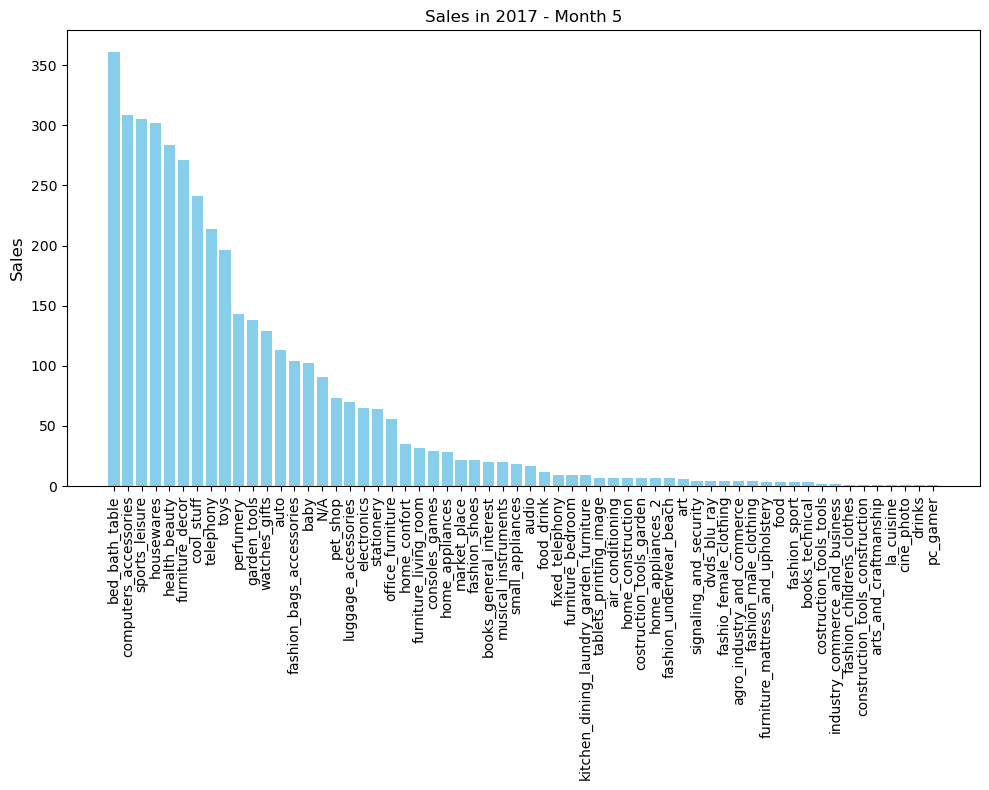

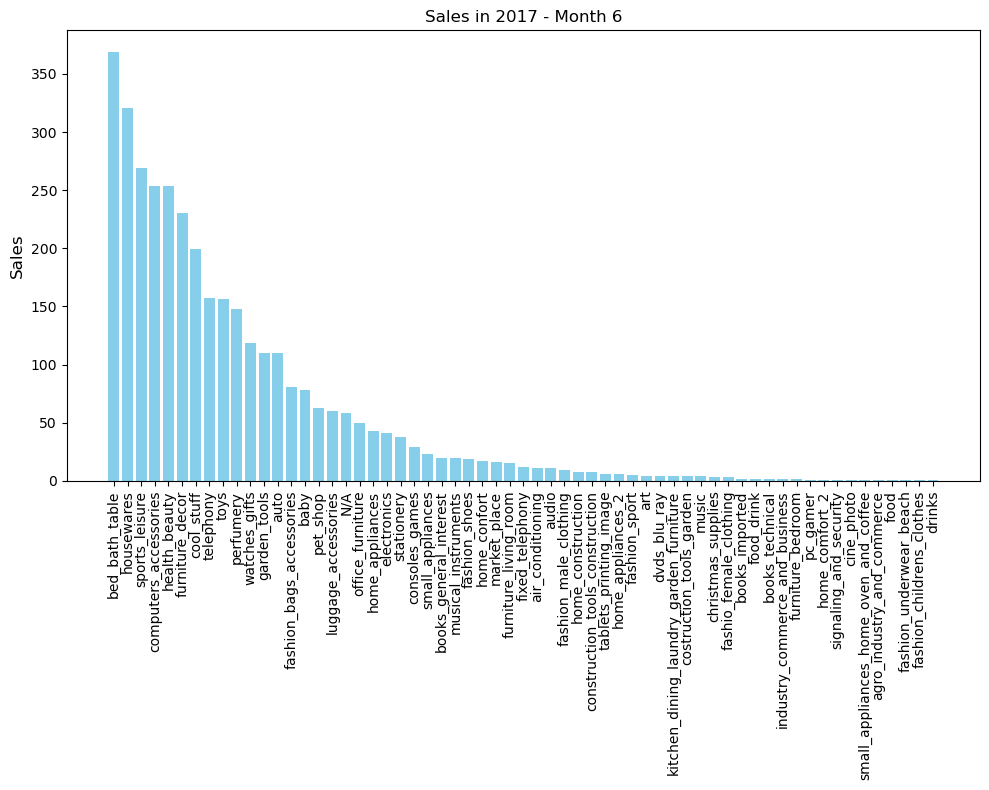

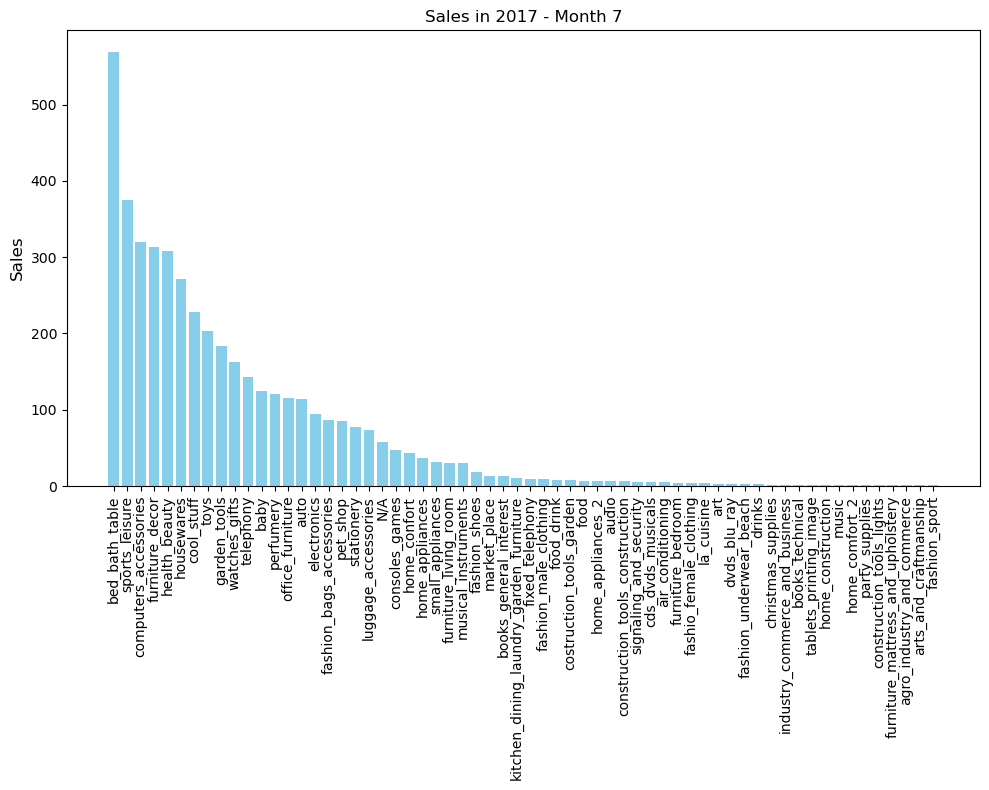

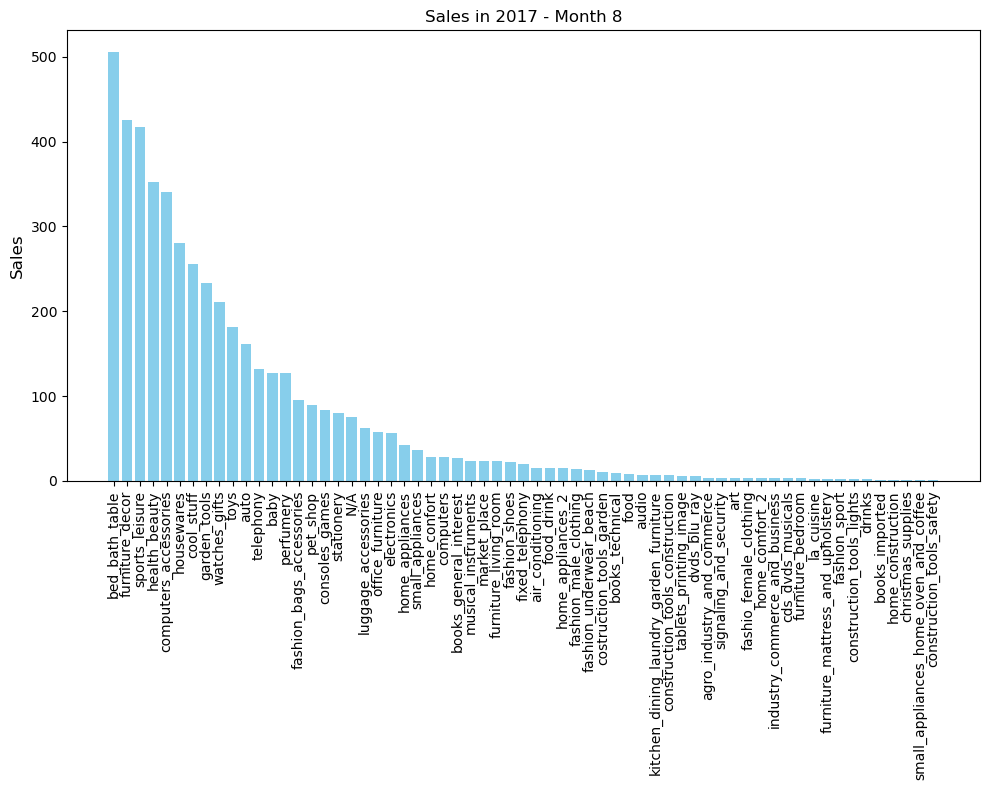

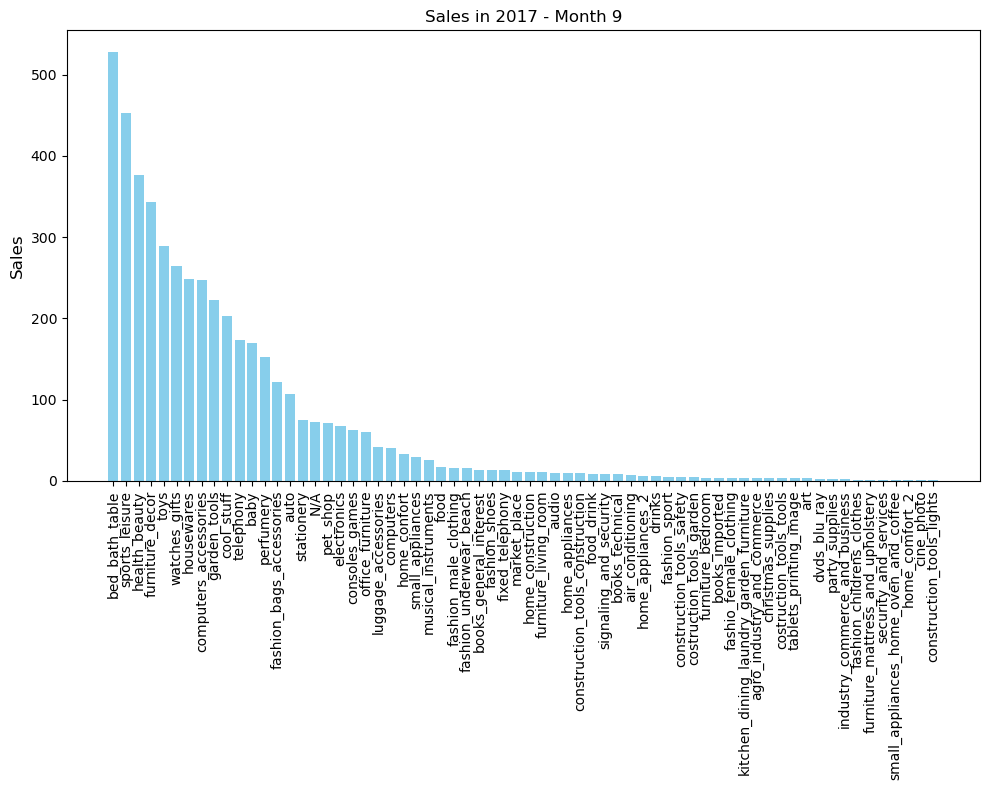

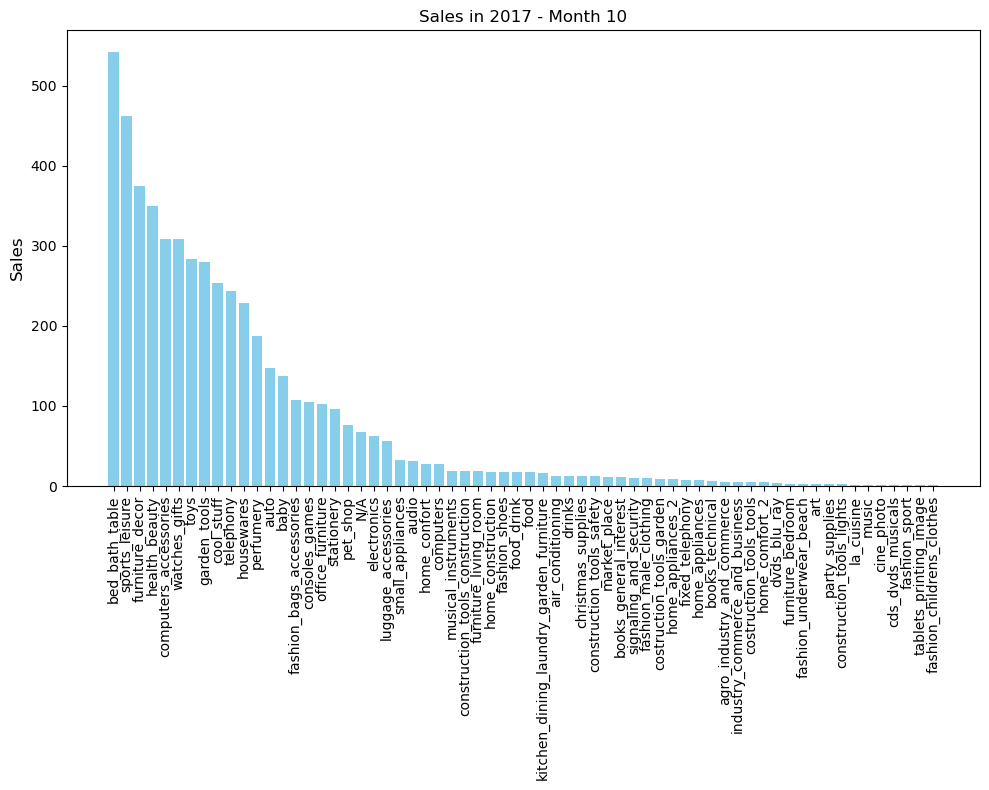

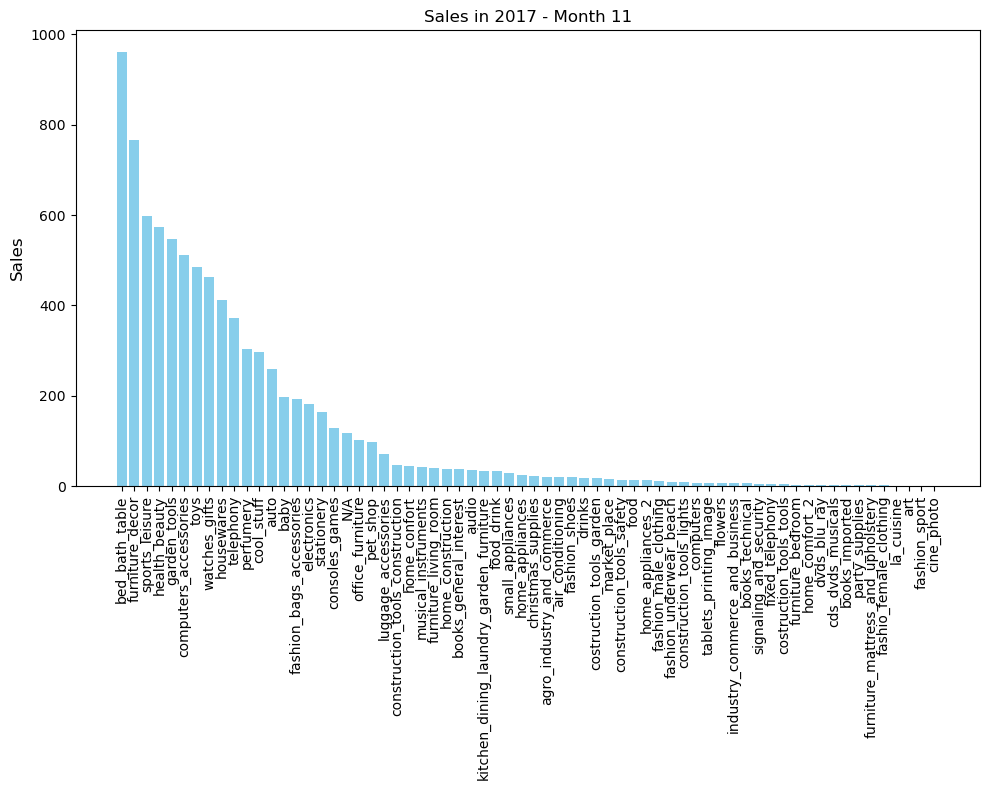

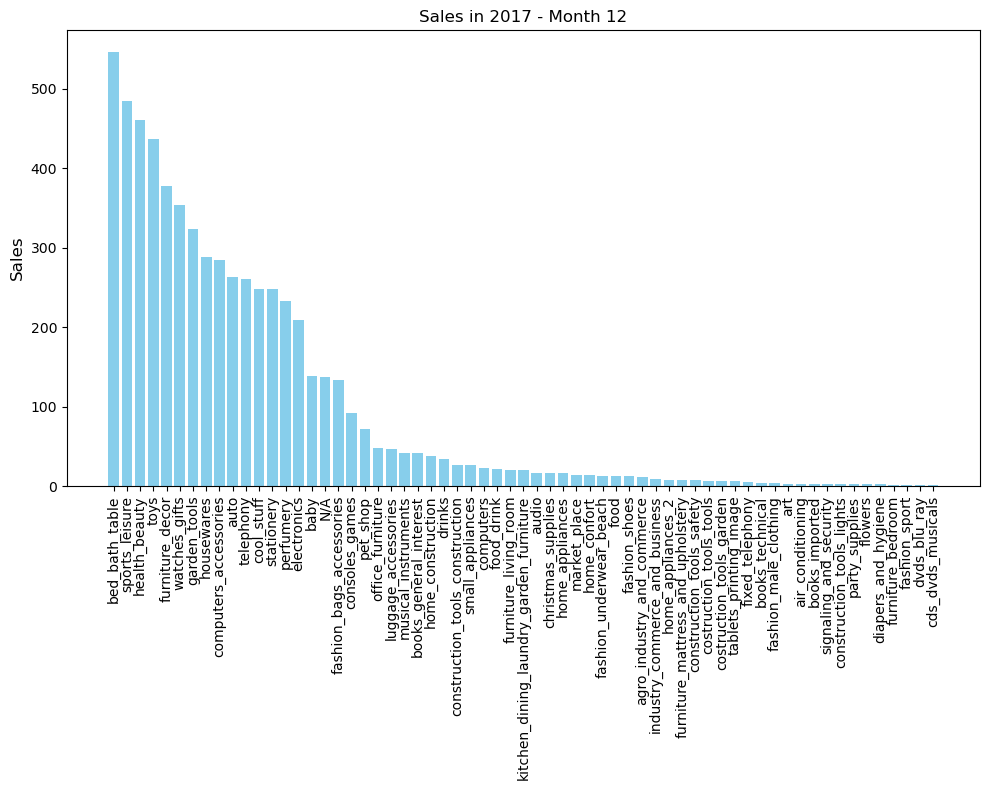

In [89]:
for month in range(1, 13):
    
    dt = product_sales_by_month[
        (product_sales_by_month['Year'] == 2017) &
        (product_sales_by_month['Month'] == month)
    ]
    
    # Sort the categories by sales within each month
    dt_sorted = dt.sort_values(by='sales', ascending=False)
    categories = dt_sorted['product_category_name_english'].values
    values = dt_sorted['sales'].values
    
    # Creating the bar chart
    plt.figure(figsize=(10, 8))
    plt.bar(categories, values, color='skyblue')
    plt.ylabel('Sales', fontsize=12)
    plt.title(f'Sales in 2017 - Month {month}')
    plt.xticks(rotation=90, fontsize=10) 
    plt.tight_layout()
    plt.show()

### 2.6 Numeric Data Features

In [90]:
orders.describe().T

,count,mean,std,min,25%,50%,75%,max
price,100196.0,123.751681,187.654634,0.850000,40.000000,78.000000,139.000000,6735.000000
freight_value,100196.0,20.069096,15.780795,0.000000,13.140000,16.320000,21.190000,409.680000
customer_zip_code_prefix,100196.0,35138.788614,29832.009608,1003.000000,11320.000000,24416.000000,59014.250000,99980.000000
geolocation_lat,99899.0,-21.212228,5.591800,-33.690972,-23.589994,-22.925419,-20.143995,42.184003
geolocation_lng,99899.0,-46.192769,4.050417,-72.670987,-48.108535,-46.632972,-43.635422,-7.738207
order_size,100196.0,1.198202,0.653297,1.000000,1.000000,1.000000,1.000000,21.000000
product_order_size,100196.0,1.099814,0.456291,1.000000,1.000000,1.000000,1.000000,20.000000
Year,100196.0,2017.543854,0.503675,2016.000000,2017.000000,2018.000000,2018.000000,2018.000000
Month,100196.0,6.037367,3.228565,1.000000,3.000000,6.000000,8.000000,12.000000


In [92]:
# Check if the 'price' column represents the individual unit price of each item or the total sales amount for the product_id.
orders[orders['order_size']!=1][['order_id', 'product_id', 'price', 'order_size', 'product_order_size']].groupby('order_id').head()

,order_id,product_id,price,order_size,product_order_size
9,e6ce16cb79ec1d90b1da9085a6118aeb,08574b074924071f4e201e151b152b4e,99.00,2,2
26,acce194856392f074dbf9dada14d8d82,d70f38e7f79c630f8ea00c993897042c,90.90,2,1
27,acce194856392f074dbf9dada14d8d82,9451e630d725c4bb7a5a206b48b99486,39.50,2,1
52,9faeb9b2746b9d7526aef5acb08e2aa0,f48eb5c2fde13ca63664f0bb05f55346,60.00,2,2
58,66e4624ae69e7dc89bd50222b59f581f,b37b72d5a56f887725c2862184b8cab8,22.99,2,2
...,...,...,...,...,...
110149,b3112ca67f3afd4e20cf2ee91fc4f804,4f18ca9862f511ecba98258b2194d061,95.00,2,2
110168,e8fd20068b9f7e6ec07068bb7537f781,0df37da38a30a713453b03053d60d3f7,356.00,2,2
110187,9115830be804184b91f5c00f6f49f92d,c982dbea53b864f4d27c1d36f14b6053,42.11,2,1
110188,9115830be804184b91f5c00f6f49f92d,49d2e2460386273b195e7e59b43587c3,26.90,2,1


In [93]:
# Verify the price column
orders[orders['product_id'] == 'f48eb5c2fde13ca63664f0bb05f55346'][['order_id', 'product_id', 'price', 'order_size', 'product_order_size']]

,order_id,product_id,price,order_size,product_order_size
52,9faeb9b2746b9d7526aef5acb08e2aa0,f48eb5c2fde13ca63664f0bb05f55346,60.0,2,2
5646,c7cfea0c153e6382e32e84c2a9dd7d2e,f48eb5c2fde13ca63664f0bb05f55346,60.0,1,1
59959,64e5cb1dfa641be49d6baa62b8f41b9c,f48eb5c2fde13ca63664f0bb05f55346,60.0,3,1
65995,f577c78346131418552c3d7fea582723,f48eb5c2fde13ca63664f0bb05f55346,60.0,2,1
93021,0f1dea9ac2c2be3ef6885442dab7ef0e,f48eb5c2fde13ca63664f0bb05f55346,60.0,1,1


After examining the price columns in the table, it can be concluded that the 'price' column indicates the unit price for each product with the product_id 'f48eb5c2fde13ca63664f0bb05f55346' always being priced at $60.

In [94]:
orders['product_sales_amt'] = orders['price']*orders['product_order_size']
orders['order_sales_amt'] = orders.groupby('order_id')['product_sales_amt'].transform('sum')

In [95]:
orders[orders['order_size'] != 1].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,product_id,seller_id,shipping_limit_date,price,freight_value,...,customer_state,geolocation_lat,geolocation_lng,product_category_name_english,order_size,product_order_size,Year,Month,product_sales_amt,order_sales_amt
9,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-06-07,08574b074924071f4e201e151b152b4e,001cca7ae9ae17fb1caed9dfb1094831,2017-05-22 19:50:18,99.00,30.53,...,RJ,-22.896553,-43.271215,garden_tools,2,2,2017,5,198.00,198.00
26,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,delivered,2018-06-04 00:00:13,2018-07-18,d70f38e7f79c630f8ea00c993897042c,977f9f63dd360c2a32ece2f93ad6d306,2018-06-13 00:35:10,90.90,48.64,...,BA,-12.940866,-38.430320,baby,2,1,2018,6,90.90,130.40
27,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,delivered,2018-06-04 00:00:13,2018-07-18,9451e630d725c4bb7a5a206b48b99486,d673a59aac7a70d8b01e6902bf090a11,2018-06-13 00:35:10,39.50,48.64,...,BA,-12.940866,-38.430320,baby,2,1,2018,6,39.50,130.40
52,9faeb9b2746b9d7526aef5acb08e2aa0,79183cd650e2bb0d475b0067d45946ac,delivered,2018-07-26 14:39:59,2018-08-16,f48eb5c2fde13ca63664f0bb05f55346,f7ba60f8c3f99e7ee4042fdef03b70c4,2018-07-30 14:55:10,60.00,15.52,...,RS,-30.049154,-51.201635,sports_leisure,2,2,2018,7,120.00,120.00
58,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,2018-04-02,b37b72d5a56f887725c2862184b8cab8,db4350fd57ae30082dec7acbaacc17f9,2018-03-15 15:30:45,22.99,22.85,...,SE,-10.972181,-37.067494,telephony,2,2,2018,3,45.98,45.98


In [96]:
orders.describe().T

,count,mean,std,min,25%,50%,75%,max
price,100196.0,123.751681,187.654634,0.850000,40.000000,78.000000,139.000000,6735.000000
freight_value,100196.0,20.069096,15.780795,0.000000,13.140000,16.320000,21.190000,409.680000
customer_zip_code_prefix,100196.0,35138.788614,29832.009608,1003.000000,11320.000000,24416.000000,59014.250000,99980.000000
geolocation_lat,99899.0,-21.212228,5.591800,-33.690972,-23.589994,-22.925419,-20.143995,42.184003
geolocation_lng,99899.0,-46.192769,4.050417,-72.670987,-48.108535,-46.632972,-43.635422,-7.738207
order_size,100196.0,1.198202,0.653297,1.000000,1.000000,1.000000,1.000000,21.000000
product_order_size,100196.0,1.099814,0.456291,1.000000,1.000000,1.000000,1.000000,20.000000
Year,100196.0,2017.543854,0.503675,2016.000000,2017.000000,2018.000000,2018.000000,2018.000000
Month,100196.0,6.037367,3.228565,1.000000,3.000000,6.000000,8.000000,12.000000
product_sales_amt,100196.0,131.956347,203.630690,0.850000,44.900000,80.000000,146.990000,13440.000000


In [97]:
sales = orders[['order_id', 'order_sales_amt', 'Year', 'Month']].drop_duplicates()
monthly_sales = pd.DataFrame(sales['order_sales_amt'].groupby([sales['Year'], sales['Month']]).sum()).reset_index()
monthly_sales.columns = ['Year', 'Month', 'sales_amt']
monthly_sales

,Year,Month,sales_amt
0,2016,9,134.97
1,2016,10,40325.11
2,2016,12,10.90
3,2017,1,111798.36
4,2017,2,234223.40
5,2017,3,359198.85
6,2017,4,340669.68
7,2017,5,489338.25
8,2017,6,421923.37
9,2017,7,481604.52


### 2.7 Subsetting the Dataset

In [98]:
len(orders)

100196

In [128]:
df = orders[orders['Year'] == 2017]

In [129]:
len(orders17)

46314

In [130]:
orders17.to_csv('order17', sep=',', index=False, encoding='utf-8')